## Capstone project
* Goals
  * Data extraction
      * Download a publicly available dataset. 
      * Describe the dataset 
      * Describe what question you intend to answer with the dataset
  * Data cleanup
      * Write a script/function to clean up the dataset. 
      * This might involve
        - cleaning up columns
        - removing/filling missing data
  * Data visualization
      * Visualize important dimensions of the data
      * Outline a few trends you can see 
  * Descriptive/Predictive analytics
      * Draw conclusions from the data
          * This can based on descriptive statistics and/or visualization
          * Predictive models (preferred) and carries 10 extra points.public
 

### Open datasets
          
* Resources for open data
  * https://data.boston.gov/
  * https://www.data.gov/
  * https://www.bls.gov/data/
  * http://www.fao.org/statistics/databases/en/
  * http://ec.europa.eu/eurostat/web/main
  * https://github.com/awesomedata/awesome-public-datasets
  * https://www.kdnuggets.com/2016/05/top-10-datasets-github.html
  * https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public

In [12]:
#Useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()
%matplotlib inline
from numpy import random
import io
import requests
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
## Importing Boston Police Department Firearm Recovery Counts dataset from https://data.boston.gov/
url = "https://data.boston.gov/dataset/3937b427-6aa4-4515-b30d-c76771313feb/resource/a3d2260f-8a41-4e95-9134-d14711b0f954/download/bpdfirearmrecoveries20180419.csv"
s = requests.get(url).content
firearm = pd.read_csv(io.StringIO(s.decode('utf-8')))
print(firearm.info())

Loading BokehJS ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 4 columns):
CollectionDate                929 non-null object
CrimeGunsRecovered            929 non-null int64
GunsSurrenderedSafeguarded    929 non-null int64
BuybackGunsRecovered          929 non-null int64
dtypes: int64(3), object(1)
memory usage: 29.1+ KB
None


In [2]:
##Data cleaning for firearm dataset
firearm= pd.DataFrame(data= firearm)
firearm.head()
firearm.isnull().sum()
firearm.info()
#so, there are no missing values in firearm dataset, and we are going to use all three variables in this dataset.
#we want to create seperate columns for Collection date variable in the same dataset
firearm['date'] = pd.to_datetime(firearm['CollectionDate'])
firearm['year'], firearm['month'], firearm['day'] = firearm['date'].dt.year, firearm['date'].dt.month, firearm['date'].dt.day
nfirearm= firearm[['year', 'month', 'day','CrimeGunsRecovered', 'GunsSurrenderedSafeguarded', 'BuybackGunsRecovered']]
nfirearm['Totalgunsrecovered']= nfirearm.CrimeGunsRecovered + nfirearm.GunsSurrenderedSafeguarded + nfirearm.BuybackGunsRecovered
nfirearm.head()
#Total guns recovered is a sum of CrimeGunsRecovered, GunsSurrenderedSafeguarded, and BuybackGunsRecovered

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 4 columns):
CollectionDate                929 non-null object
CrimeGunsRecovered            929 non-null int64
GunsSurrenderedSafeguarded    929 non-null int64
BuybackGunsRecovered          929 non-null int64
dtypes: int64(3), object(1)
memory usage: 29.1+ KB


C:\Users\Ashok\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,year,month,day,CrimeGunsRecovered,GunsSurrenderedSafeguarded,BuybackGunsRecovered,Totalgunsrecovered
0,2014,8,20,2,3,1,6
1,2014,8,21,2,0,4,6
2,2014,8,22,0,0,2,2
3,2014,8,25,8,3,0,11
4,2014,8,26,9,0,0,9


Text(0.5,1,'Total number of guns recovered through different approaches on yearly-basis')

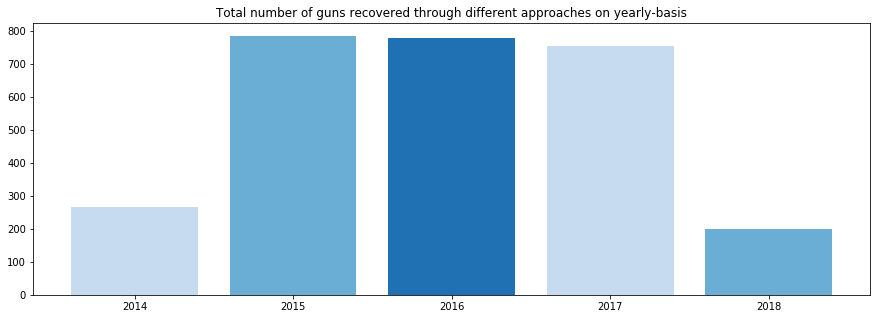

In [44]:
BPD= nfirearm.groupby("year")['CrimeGunsRecovered', 'GunsSurrenderedSafeguarded', 'BuybackGunsRecovered', 'Totalgunsrecovered'].sum()
BPD= pd.DataFrame(data= BPD)
BPD= BPD.reset_index()
plt.figure(figsize=(15,5))
plt.xticks(BPD.year, ('2014', '2015','2016','2017', '2018'))
plt.bar(BPD.year, BPD.Totalgunsrecovered, color=sns.color_palette("Blues",3))
plt.title("Total number of guns recovered through different approaches on yearly-basis")


#### The above bar graph shows the time series analysis of total number of guns recovered through all the three approaches (CrimeGunsRecovered, GunsSurrenderedSafeguarded, BuybackGunsRecovered). It clearly shows that highest number of guns recovered are in the year 2015, 2016 and 2017, whereas in the year 2018, it has the lowest number of gun recovery incidents(because of less data available for the year 2018).

Text(0.5,1,'Number of guns recovered through different approaches on yearly-basis')

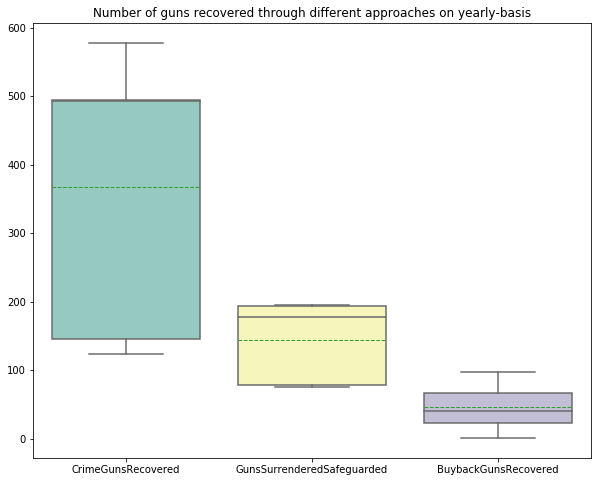

In [4]:
BPD1= BPD.iloc[:,1:4]
plt.figure(figsize=(10,8))
#plt.xticks(BPD.year, ('2014','2015','2016', '2017', '2018'))
M= sns.boxplot(data= BPD1, meanline= True, showmeans= True, palette="Set3")
plt.title("Number of guns recovered through different approaches on yearly-basis")


#### The above box plot shows the data distribution of all the three approaches which indicates the first quartile, second quartile, third quartile, median, and mean. The dotted green line indicates the mean line. In addition, there are no outliers in the dataset.

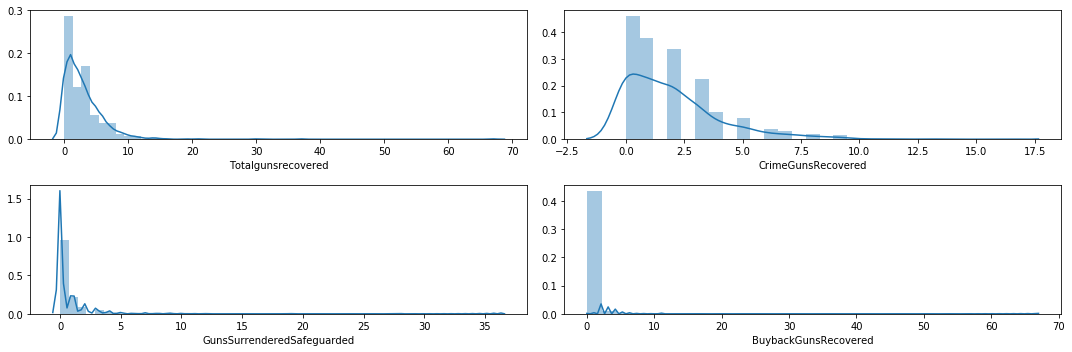

In [6]:
# Default distribution plot
plt.figure(figsize=(15,5))
plt.subplot(2, 2,1)
sns.distplot(nfirearm.Totalgunsrecovered);
plt.subplot(2, 2,2)
sns.distplot(nfirearm.CrimeGunsRecovered);
plt.subplot(2, 2,3)
sns.distplot(nfirearm.GunsSurrenderedSafeguarded);
plt.subplot(2, 2,4)
sns.distplot(nfirearm.BuybackGunsRecovered);
plt.tight_layout()

#### In the above distribution plots, the data distribution is right skewed in all the variables.

In [10]:
import sklearn
from patsy import dmatrices
from sklearn import ensemble
y, X = dmatrices('CrimeGunsRecovered ~ Totalgunsrecovered', data=nfirearm)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X,y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

C:\Users\Ashok\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


             precision    recall  f1-score   support

        0.0       1.00      0.70      0.82       253
        1.0       0.81      0.71      0.76       208
        2.0       0.67      0.56      0.61       186
        3.0       0.57      0.60      0.59       123
        4.0       0.33      0.53      0.41        55
        5.0       0.41      0.66      0.51        44
        6.0       0.37      0.81      0.51        21
        7.0       0.33      0.59      0.43        17
        8.0       0.32      0.80      0.46        10
        9.0       0.29      0.88      0.44         8
       10.0       0.00      0.00      0.00         1
       11.0       0.00      0.00      0.00         1
       13.0       0.00      0.00      0.00         1
       16.0       1.00      1.00      1.00         1

avg / total       0.72      0.65      0.67       929



C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Conclusion: In the entire test dataset, 72% predicted number of crime guns recovered are accurate, and moroever 65% of the data predicted is relevant or correctly predicted based on the actual number of crime guns recovered.

In [13]:
## Importing BPD Field Interrogation and Observation (FIO) dataset from https://data.boston.gov/
url = "https://data.boston.gov/dataset/4ebae674-28c1-4b9b-adc3-c04c99234a68/resource/c696738d-2625-4337-8c50-123c2a85fbad/download/boston-police-department-fio.csv"
s = requests.get(url).content
fio = pd.read_csv(io.StringIO(s.decode('utf-8')))
#deleting unwanted variables
fio= fio.drop(['SEQ_NUM', 'LOCATION', 'DIST', 'DIST_ID', 'FIO_TIME', 'CLOTHING', 'FIOFS_TYPE', 'SEARCH', 'ENTEREDBY',
               'FIOFS_REASONS', 'OFFICER', 'VEH_YEAR_NUM', 'VEH_COLOR', 'VEH_MODEL', 'SUPERVISOR_ID', 'OFFICER_ID', 
               'SUPERVISOR', 'OFF_DIST_ID', 'OFF_DIST', 'OFFICER', 'SUP_ENTRYDATE', 'LAST_UPDATEBY', 'LAST_UPDATETIME',
               'ETHNICITY', 'FIRST_INSERTTIME', 'ACTIVE_ID', 'RACE_ID', 'FIO_DATE_CORRECTED', 'STREET_ID'], axis= 1)

In [14]:
## Data cleaning for fio dataset
nfio= pd.DataFrame(data= fio) # Converting into dataframe
nfio.head()
nfio.isnull().sum()          
nfio['date'] = pd.to_datetime(nfio['FIO_DATE']) # creating new variable date
nfio['year'], nfio['month'], nfio['day'] = nfio['date'].dt.year, nfio['date'].dt.month, nfio['date'].dt.day # seperating date variable in year, month and day
nfio= nfio[nfio['year'] <= 2018] # deleting unwanted data
nfio= nfio.drop(['FIO_DATE'], axis= 1) # dropping FIO_DATE variable

In [15]:
#Identify the a) ID variables b)  Target variables c) Categorical Variables
ID_col = ['FIO_ID']
target_col = ["TERRORISM"]
cat_cols = ['SEX','PRIORS','DESCRIPTION','COMPLEXION','BASIS','STOP_REASONS', 'OUTCOME','VEH_MAKE',
            'VEH_OCCUPANT','VEH_STATE','RACE_DESC','CITY']


In [16]:
#Impute categorical missing values with -9999
nfio[cat_cols] = nfio[cat_cols].fillna(value = -9999)

In [17]:
#Creating a new dataframe
nfio1= pd.DataFrame(data= nfio)

In [18]:
nfio1= nfio1[nfio1['AGE_AT_FIO_CORRECTED'] >= 18] # deleting unwanted data
nfio1= nfio1[nfio1['AGE_AT_FIO_CORRECTED'] <= 100]# deleting unwanted data

In [19]:
nfio1.describe()

,FIO_ID,AGE_AT_FIO_CORRECTED,year,month,day
count,137920.000000,137920.000000,137920.000000,137920.000000,137920.000000
mean,590354.164059,30.020033,2012.591459,6.123173,15.552204
std,44547.995637,10.692148,1.373352,3.266825,8.826154
min,510892.000000,18.000000,1964.000000,1.000000,1.000000
25%,552375.750000,22.000000,2012.000000,3.000000,8.000000
50%,590588.500000,26.000000,2013.000000,6.000000,15.000000
75%,629029.250000,35.000000,2014.000000,9.000000,23.000000
max,666975.000000,100.000000,2018.000000,12.000000,31.000000


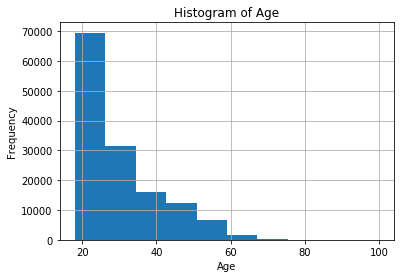

In [20]:
#Creating bins for the age variable
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
nfio1['age_range'] = pd.cut(nfio1.AGE_AT_FIO_CORRECTED, bins, labels = labels,include_lowest = True)
nfio1.AGE_AT_FIO_CORRECTED.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

#### In the above histogram, it clearly indicates that maximum number of age frequency falls within 20-35 age group

In [21]:
#Dropping old variable called 'AGE_AT_FIO_CORRECTED'
nfio2= nfio1.drop(['AGE_AT_FIO_CORRECTED'], axis= 1)

In [22]:
#cat_cols1 = ['SEX','PRIORS','DESCRIPTION','COMPLEXION','BASIS','STOP_REASONS', 'OUTCOME','VEH_MAKE',
            # 'VEH_OCCUPANT','VEH_STATE', 'CITY', 'age_range']
cat_cols1 = ['SEX','DESCRIPTION','COMPLEXION', 'age_range'] # Creating a new dataset cat_cols1 with the list of columns chosen for running a logistic regression
#Creating dummy variables for logistic regression model
for var in cat_cols1:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(nfio1[var], prefix=var)
    nfio2=nfio1.join(cat_list)
    nfio1=nfio2

In [24]:
#creating label encoders for all categorical variables
for var in cat_cols:
 number = LabelEncoder()
 nfio1[var] = number.fit_transform(nfio1[var].astype('str'))

In [25]:
#Converting target variable into binary variable
nfio1["TERRORISM"] = number.fit_transform(nfio1["TERRORISM"].astype('str'))

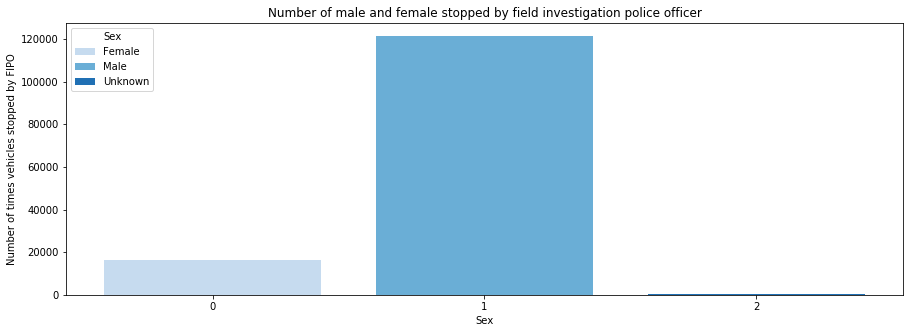

In [26]:
##Data Visualization of fio dataset
AA= nfio2.groupby("SEX")['STOP_REASONS'].count()
AA= pd.DataFrame(data= AA)
AA= AA.reset_index()
plt.figure(figsize=(15,5))
plt.xticks(AA.SEX, ('0','1','2'))
D= plt.bar(AA.SEX, AA.STOP_REASONS, color=sns.color_palette("Blues",3))
plt.title('Number of male and female stopped by field investigation police officer')
#plt.legend('Female', 'Male', 'Unknown')
plt.ylabel('Number of times vehicles stopped by FIPO')
plt.xlabel('Sex')
plt.legend(D, ['Female','Male','Unknown'], loc = "upper left", title = "Sex")
plt.show()

#### In the above bar graph, it clearly indicates that majority of them are male sex(Label= 1) driver of vehicle which are being stopped by field police officer as compared with female drivers(0). The Y-axis variable represents the number of times the individual stopped by the field investigative officer  

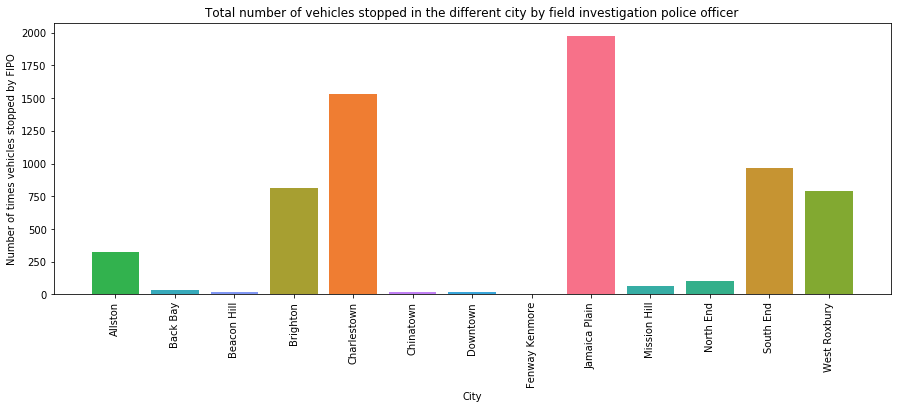

In [27]:
AB= nfio.groupby('CITY')['STOP_REASONS'].count()
AB= pd.DataFrame(data= AB)
AB= AB.reset_index()
AB= AB.sort_values('STOP_REASONS', ascending= False)
AB= AB[AB['STOP_REASONS']<= 2000]
plt.figure(figsize=(15,5))
F= plt.bar(AB.CITY, AB.STOP_REASONS, color=sns.color_palette("husl", 14))
# plt.legend(F, ['Allston','Back Bay','Beacon Hill','Brighton', 'Charlestown', 'Chinatown', 'Downtown', 'Fenway Kenmore',
#              'Jamaica Plain','Mission Hill', 'North End', 'Roslindale', 'South End', 'West Roxbury'], loc = "upper left", title = "City")
#plt.legend([F])
plt.xticks(rotation=90)
plt.title('Total number of vehicles stopped in the different city by field investigation police officer')
plt.ylabel('Number of times vehicles stopped by FIPO')
plt.xlabel('City')
plt.show()

#### In the above graph, it shows the number of times vehicle stopped in different city by the field investigation police officer. It has been analysed that maximum number of vehicles stopped are in jamaica plain, Charlestown, South End, West Roxbury, Brighton and so on. This graph helps us assume that number of traffic violations, and various other crimes are higher as compared to other cities. This has caused police officers to be alert and investigative all the time in this localities.

C:\Users\Ashok\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The Vega20_r colormap was deprecated in version 2.0. Use tab20_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Total number of vehicles stopped by field investigation police officer on yearly-basis')

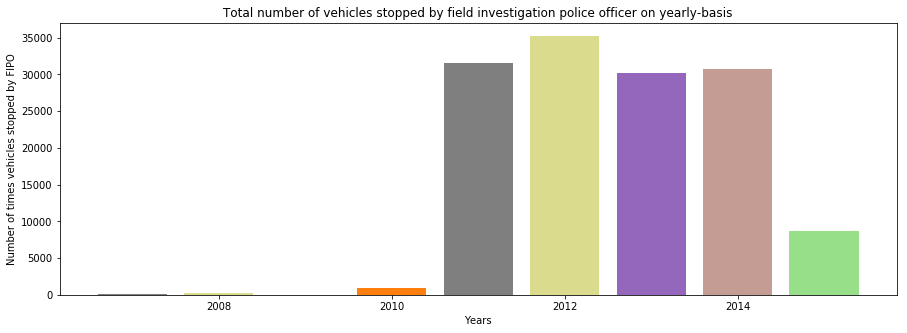

In [28]:
AD= nfio2.groupby('year')['STOP_REASONS'].count()
AD= pd.DataFrame(data= AD)
AD= AD.reset_index()
AD= AD.sort_values('STOP_REASONS', ascending= False)
AD= AD[AD['STOP_REASONS']> 100]
plt.figure(figsize=(15,5))
G= plt.bar(AD.year, AD.STOP_REASONS, color=sns.color_palette("Vega20_r"))
plt.ylabel('Number of times vehicles stopped by FIPO')
plt.xlabel('Years')
plt.title('Total number of vehicles stopped by field investigation police officer on yearly-basis')

#### In the above graphs, it depicts yearly-basis maximum number of vehicles stopped by the field investigation officers in various different cities. The highest number of vehicles stopped for investigative purpose is in the year 2012, 2011, 2013, & 2014. 

Text(0.5,1,'Total number of vehicles stopped by field investigation police officer based age-groups')

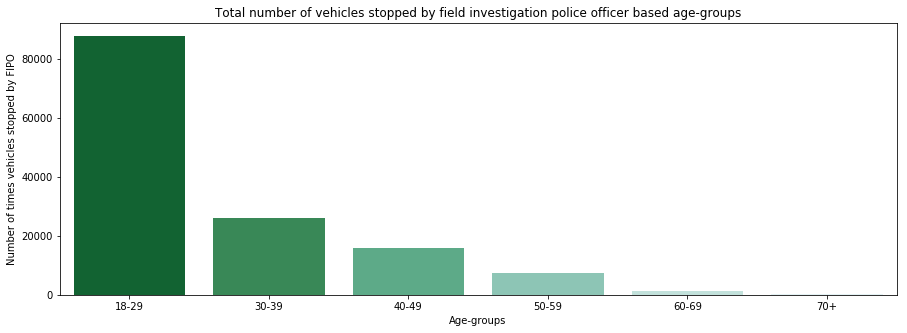

In [29]:
AE= nfio2.groupby('age_range')['STOP_REASONS'].count()
AE= pd.DataFrame(data= AE)
AE= AE.reset_index()
AE= AE.sort_values('STOP_REASONS', ascending= False)
AE= AE[AE['STOP_REASONS']> 100]
plt.figure(figsize=(15,5))
sns.barplot(AE.age_range, AE.STOP_REASONS, palette="BuGn_r")
plt.ylabel('Number of times vehicles stopped by FIPO')
plt.xlabel('Age-groups')
plt.title('Total number of vehicles stopped by field investigation police officer based age-groups')

#### In the above graph, it shows the number of vehicles stopped by the FIPO, based on different age-groups. It clearly indicates that age group 18-29, has highest number of vehicle investigation in the cities, whereas age-group 60-69 and 70+ has the lowest numbers of vehicle investigation.

In [30]:
#Deleting unwanted columns from the nfio3 dataset
nfio3= nfio2
nfio3= nfio3.drop(['FIO_ID', 'SEX', 'PRIORS', 'DESCRIPTION', 'COMPLEXION', 'BASIS', 'STOP_REASONS', 'OUTCOME', 
                   'VEH_MAKE', 'age_range', 'VEH_OCCUPANT', 'VEH_STATE', 'RACE_DESC', 'AGE_AT_FIO_CORRECTED', 'CITY', 'date',
                  'year', 'month', 'day'], axis= 1)


TERRORISM
NO     152044
YES       168
Name: TERRORISM, dtype: int64


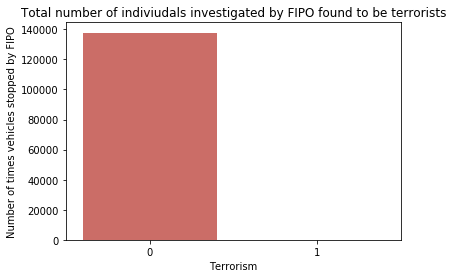

In [31]:
print(nfio.groupby('TERRORISM')['TERRORISM'].count())
sns.countplot(x='TERRORISM',data=nfio3, palette='hls')
plt.ylabel('Number of times vehicles stopped by FIPO')
plt.xlabel('Terrorism')
plt.title('Total number of indiviudals investigated by FIPO found to be terrorists')
plt.show()

#### In the above bar graph, it shows that the response variable has maximum number of 0 (i.e. an individual is not a terrorist), and minimum number is 1(i.e. an individual is a terrorist). So, we want to run a logistic regression model using Terrorism variable as a response variable.

In [38]:
#Splitting data into training and test datasets
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
X = nfio3.iloc[:,1:]
y = nfio3.iloc[:,0]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30,random_state=0)

In [39]:
#X_train.shape
#X_train.columns.values
X_train.shape

(96544, 27)

In [40]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[41334     0]
 [   42     0]]


In [42]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     41334
          1       0.00      0.00      0.00        42

avg / total       1.00      1.00      1.00     41376



C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Conclusion: In the entire test dataset, the predicted binary value says that 100% of the individuals are not terrorist or they have not committed the crimes in the past (i.e. 100% predicted values are accurate). Moreover, 100% of the individuals predicted as non-terrorist are relevant to the actual test dataset. 